In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
raw_data = pd.read_csv('Titanic-Dataset.csv')

shape of dataset:  (891, 12)
     PassengerId  Survived  Pclass  \
486          487         1       1   
755          756         1       2   
138          139         0       3   
226          227         1       2   
259          260         1       2   

                                                Name     Sex    Age  SibSp  \
486  Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)  female  35.00      1   
755                        Hamalainen, Master. Viljo    male   0.67      1   
138                              Osen, Mr. Olaf Elon    male  16.00      0   
226                        Mellors, Mr. William John    male  19.00      0   
259                      Parrish, Mrs. (Lutie Davis)  female  50.00      0   

     Parch     Ticket     Fare Cabin Embarked  
486      0      19943  90.0000   C93        S  
755      1     250649  14.5000   NaN        S  
138      0       7534   9.2167   NaN        S  
226      0  SW/PP 751  10.5000   NaN        S  
259      1     230433  26.0000   

/var/folders/v7/pbm3p1b90xj1b3rj5vtl1_4w0000gn/T/ipykernel_6049/4096744443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=raw_data, x="Survived", palette="Set2", ax=axes[0,0])
/var/folders/v7/pbm3p1b90xj1b3rj5vtl1_4w0000gn/T/ipykernel_6049/4096744443.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=raw_data[raw_data["Survived"]==0]["Age"], label="Did Not Survive", shade=True, ax=axes[1,1])
/var/folders/v7/pbm3p1b90xj1b3rj5vtl1_4w0000gn/T/ipykernel_6049/4096744443.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=raw_data[raw_data["Survived"]==1]["Age"], label="Survi

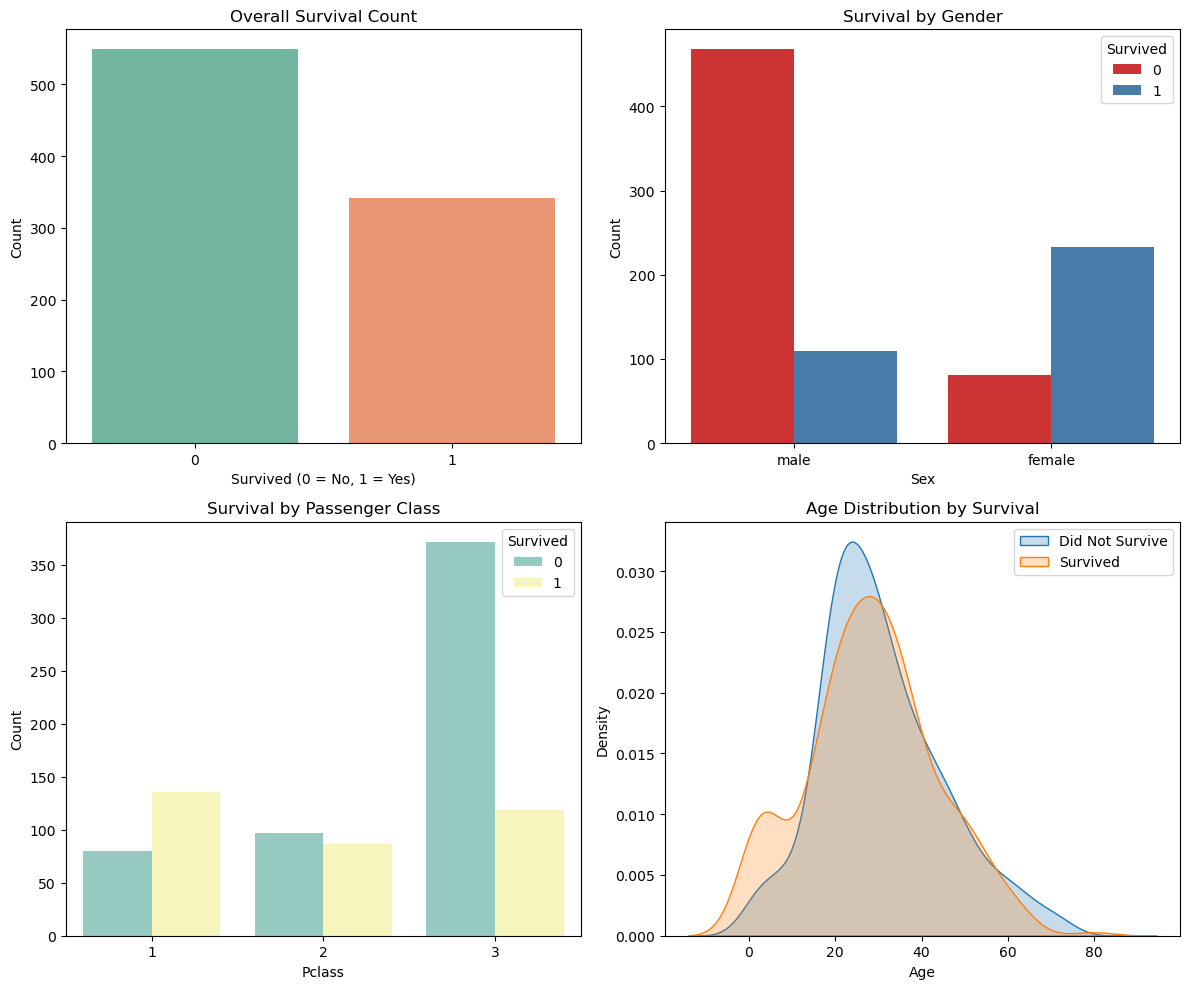

In [3]:
print('shape of dataset: ', raw_data.shape)
print(raw_data.sample(5))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# overall Survival count
sns.countplot(data=raw_data, x="Survived", palette="Set2", ax=axes[0,0])
axes[0,0].set_title("Overall Survival Count")
axes[0,0].set_xlabel("Survived (0 = No, 1 = Yes)")
axes[0,0].set_ylabel("Count")

#  survival by Gender
sns.countplot(data=raw_data, x="Sex", hue="Survived", palette="Set1", ax=axes[0,1])
axes[0,1].set_title("Survival by Gender")
axes[0,1].set_ylabel("Count")

# survival by Passenger class
sns.countplot(data=raw_data, x="Pclass", hue="Survived", palette="Set3", ax=axes[1,0])
axes[1,0].set_title("Survival by Passenger Class")
axes[1,0].set_ylabel("Count")

# Age distribution by Survival
sns.kdeplot(data=raw_data[raw_data["Survived"]==0]["Age"], label="Did Not Survive", shade=True, ax=axes[1,1])
sns.kdeplot(data=raw_data[raw_data["Survived"]==1]["Age"], label="Survived", shade=True, ax=axes[1,1])
axes[1,1].set_title("Age Distribution by Survival")
axes[1,1].set_xlabel("Age")
axes[1,1].legend()

plt.tight_layout()
plt.show()


In [4]:
data = raw_data.copy()

# select useful features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"
data = data[features + [target]]

In [5]:
# handle Missing Values
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

In [6]:
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

In [7]:
x = data.drop(target, axis=1)
y = data[target]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (712, 8)
Testing set shape: (179, 8)



📌 KNN Model
Accuracy: 0.6592
ROC AUC: 0.6863
Confusion Matrix:
 [[84 26]
 [35 34]]
Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.71      0.76      0.73       110
       Survived       0.57      0.49      0.53        69

       accuracy                           0.66       179
      macro avg       0.64      0.63      0.63       179
   weighted avg       0.65      0.66      0.65       179


📌 Decision Tree Model
Accuracy: 0.8212
ROC AUC: 0.7949
Confusion Matrix:
 [[97 13]
 [19 50]]
Classification Report:
                  precision    recall  f1-score   support

Did Not Survive       0.84      0.88      0.86       110
       Survived       0.79      0.72      0.76        69

       accuracy                           0.82       179
      macro avg       0.81      0.80      0.81       179
   weighted avg       0.82      0.82      0.82       179


📌 Random Forest Model
Accuracy: 0.8156
ROC AUC: 0.8345
Confusion Matrix:
 [[96 14]


,Accuracy,ROC AUC
Decision Tree,0.821229,0.794928
Random Forest,0.815642,0.834453
KNN,0.659218,0.686298


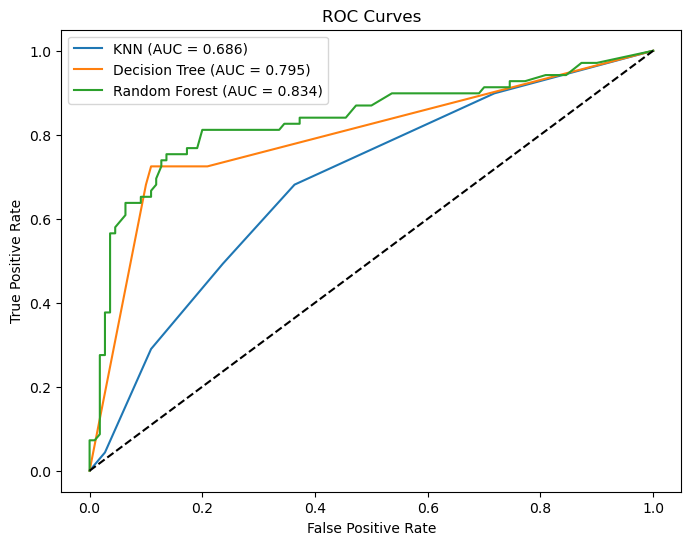

In [10]:

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train
    model.fit(x_train, y_train)
    # Predict
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # for ROC AUC
    
    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=["Did Not Survive", "Survived"])
    
    # Store results
    results[name] = {"Accuracy": acc, "ROC AUC": auc, "Confusion Matrix": cm, "Report": cr}
    
    # Print summary
    print(f"\n📌 {name} Model")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)

# ==============================
# Compare Models
# ==============================
comparison = pd.DataFrame({
    model: [results[model]["Accuracy"], results[model]["ROC AUC"]] 
    for model in results
}, index=["Accuracy", "ROC AUC"]).T

print("\n🔎 Model Comparison:\n")
display(comparison.sort_values(by="Accuracy", ascending=False))

# Plot ROC Curves for all models
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})")

plt.plot([0,1], [0,1], "k--")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [11]:
# ==============================
# Final Summary
# ==============================
best_model = comparison["Accuracy"].idxmax()
best_acc = comparison.loc[best_model, "Accuracy"]
best_auc = comparison.loc[best_model, "ROC AUC"]

print("✅ Best Model Selected:")
print(f"Model: {best_model}")
print(f"Accuracy: {best_acc:.4f}")
print(f"ROC AUC: {best_auc:.4f}")


✅ Best Model Selected:
Model: Decision Tree
Accuracy: 0.8212
ROC AUC: 0.7949
